In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patheffects
%matplotlib inline

In [13]:
def constrain_function(x,k):
    num_constraint = 6
    q = [0]*num_constraint
    lambda_parameter = [1]*num_constraint
    theta = [1]*num_constraint
    q[0] = 100 - (x[0]-5)**2 - (x[1]-5)**2 
    q[1] = (x[0] - 6)**2 + (x[1] - 5)**2 - 82.81
    q[2] = 13 - x[0]
    q[3] = x[0] - 100
    q[4] = 0 - x[1]
    q[5] = x[0] - 100
    penalty_term = 0
    h = k**(3/2)
    for i in range(num_constraint):
        if q[i]>=1: lambda_parameter[i] = 2
        if q[i]<0.001: theta[i] = 10
        elif q[i]<0.1: theta[i] = 20
        elif q[i]<1: theta[i] = 100
        else: theta[i] = 300
        penalty_term = penalty_term + theta[i]*q[i]**lambda_parameter[i]
  
    objective_function = (x[0] - 10)**3 + (x[1] - 20)**3
  
    return objective_function + penalty_term

    


In [14]:
def constr_function_b(a,b):
    a = np.array(a)
    b = np.array(b)
    ans = (a-10)**3 + (b-20)**3
    ans = list(ans)
    return ans

In [15]:
def constr_1(a,b):
    a = np.array(a)
    b = np.array(b)
    ans = 100 - (a-5)**2 - (b-5)**2
    ans = list(ans)
    return ans

In [28]:
def constr_2(a,b):
    a = np.array(a)
    b = np.array(b)
    ans = -1*((a-6)**2 + (b-5)**2 - 82.21)
    ans = list(ans)
    return ans    

In [47]:
def constr_3(a,b):
    ans = a-13
    ans = list(ans)
    return ans    

In [53]:
def constr_4(a,b):
    a = np.array(a)
    b = np.array(b)
    ans = b 
    ans = list(ans)
    return ans      

In [70]:
num_particle = 10 #num_particles
b_up =10.0
b_low = 0.0
max_iter = 100
iteration = 0
w = 1.2
c1 = 2
c2 =2

In [71]:
x = []
#initializing position of the particles
for i in range(num_particle):
    k = np.random.uniform(low=b_low, high=b_up, size=(1,2))[0]
    x.append(k)


g_best = x[0]
#finding global blest
for i in range(num_particle):
    if constrain_function(x[i],0) < constrain_function(g_best,0):
        g_best = x[i]

#initializing velocity of the particle
v = []
for i in range(num_particle):
    m = np.random.uniform(low=-abs(b_up-b_low), high=abs(b_up-b_low), size=(1,2))[0]
    v.append(m)


In [72]:
x_old = x.copy()
p_best = x.copy()
x_new = x.copy()
X_all = []

while(iteration<max_iter):
    p_best = x
    X_all.append(x_old)
    for i in range(num_particle):
        for j in range(len(x[0])):
            r_p = np.random.uniform(0,1)
            r_g = np.random.uniform(0,1)
            v[i][j] = w*v[i][j] + c1*r_p*(p_best[i][j]-x_old[i][j]) + c2*r_g*(g_best[j]-x_old[i][j])
    
    x_new[i] = x_old[i] + v[i]
    
    if constrain_function(x_new[i],iteration) < constrain_function(p_best[i],iteration):
        p_best[i] = x_new[i]
        if constrain_function(p_best[i],iteration) < constrain_function(g_best,iteration):
            g_best = p_best[i]
        
   # print(constrain_function(p_best[i],iter),constrain_function(g_best,iter))
    w = 0.9*w      
    x_old = x_new
    iteration = iteration + 1

In [73]:
g_best

array([13.59561606, -0.10930529])

In [74]:
print(constrain_function(g_best,iteration))

-9709.465995599347


In [75]:
def coordinates(X,num_particles):
    x_par = []
    y_par = []

    for i in range(num_particles):
        x_par.append(X[i][0])
        y_par.append(X[i][1])
    return x_par,y_par

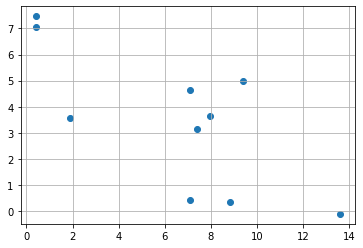

In [93]:
a,b = coordinates(X_all[99],10)
c = constr_function_b(a,b)
plt.scatter(a,b)
plt.grid()
plt.show()

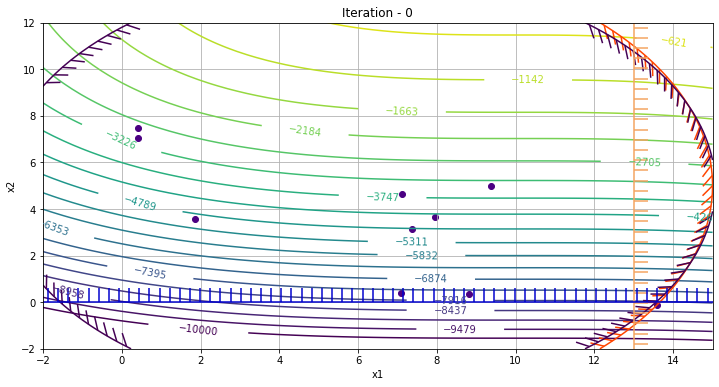

In [94]:
x1 = np.linspace(-2,15,70)
x2 = np.linspace(-2,12,70)
x1,x2 = np.meshgrid(x1,x2)
func = constr_function_b(x1,x2)
fig, ax = plt.subplots()
levels = np.linspace(-10000,-100,20)

CS = ax.contour(x1, x2, func, levels)

CS1 = ax.contour(x1, x2, constr_1(x1,x2), [0],colors='orangered')
plt.setp(CS1.collections,path_effects=[patheffects.withTickedStroke(angle=135)])

CS2 = ax.contour(x1, x2, constr_2(x1,x2), [0])
plt.setp(CS2.collections,path_effects=[patheffects.withTickedStroke(angle=135)])

CS3 = ax.contour(x1, x2, constr_3(x1,x2), [0], colors = "sandybrown")
plt.setp(CS3.collections,path_effects=[patheffects.withTickedStroke(angle=90)])

CS4 = ax.contour(x1, x2, constr_4(x1,x2), [0], colors = "mediumblue")
plt.setp(CS4.collections,path_effects=[patheffects.withTickedStroke(angle=90)])

ax.clabel(CS, inline=1, fontsize=10)
ax.scatter(a,b,color='indigo')
fig.set_size_inches(12,6)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.title('Iteration - 0')
plt.show()

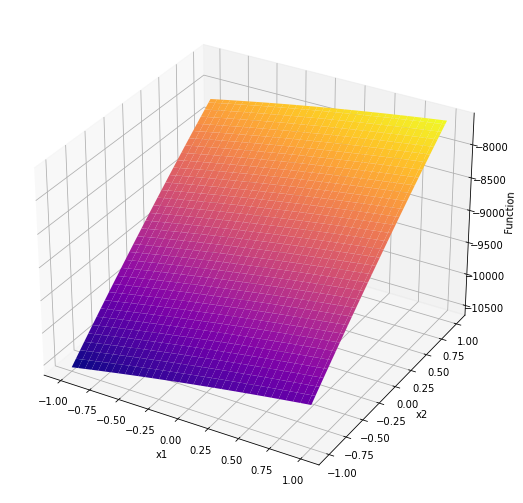

In [61]:
x1 = np.linspace(-1,1,70)
x2 = np.linspace(-1,1,70)
x1,x2 = np.meshgrid(x1,x2)
func = constr_function_b(x1,x2)
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.plot_surface(x1, x2, np.array(func), cmap = 'plasma')
plt.xlabel('x1')
plt.ylabel('x2')
ax.set_zlabel('Function')
plt.show()